In [31]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
#feature and dimension expand, why?
#what if we only use original features?
#Assume we have three orignal features: amt, paymtd, paytype
#dictionary for each feature is as following:
##Amt:0-9
##Paymtd:0-9
##Paytype:0-9
##RecorPay:0-9
#suppose we have three class of txn as following:
##txn_class1:Amt always in bin 0
##txn_class1:Amt always in bin 5
##txn_class1:Amt always in bin 9
###We want to use our models to find such three kinds of txn_class
def txn_class1():
    amt=np.random.choice(10,1,p=[0.0,0.0,0.0,0.0,0.0,
                                0.0,0.0,0.0,0.0,1.0])[0]
    paymed=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    paytype=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    RecorPay=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    bene=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    return [amt,paymed,paytype,RecorPay,bene]


def txn_class2():
    amt=np.random.choice(10,1,p=[1.0,0.0,0.0,0.0,0.0,
                                0.0,0.0,0.0,0.0,0.0])[0]
    paymed=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    paytype=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    RecorPay=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    bene=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    return [amt,paymed,paytype,RecorPay,bene]

def txn_class3():
    amt=np.random.choice(10,1,p=[0.0,0.0,0.0,0.0,1.0,
                                0.0,0.0,0.0,0.0,0.0])[0]
    paymed=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    paytype=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    RecorPay=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    bene=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    return [amt,paymed,paytype,RecorPay,bene]


class Sythetic:
    def __init__(self):
        print('Sythetic instance created!')
        
    def Kmeans(self,data,K,plt):
        sse = {}
        t0=time()
        for k in range(1, K+1):
            kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
            sse[k] = kmeans.inertia_ 
        t1=time()
        plt.plot(list(sse.keys()), list(sse.values()))
        plt.set_title('Kmeans')
        plt.set_xlabel("Number of cluster")
        plt.set_ylabel("SSE")
        print('Kmeans running time:%f sec!'%(t1-t0))
        return sse
        
    def SVD(self,data,K,plt):
        t0=time()
        svd=TruncatedSVD(n_components=K,n_iter=500,random_state=0)
        svd.fit(data)
        sigma=svd.singular_values_
        t1=time()
        x=[i for i in range(1,K+1)]
        plt.plot(x,sigma)
        plt.set_title('SVD')
        plt.set_xlabel("Singular Value Position")
        plt.set_ylabel("Singular Value")
        print('SVD running time:%f sec!'%(t1-t0))
        return sigma, svd.explained_variance_ratio_,svd.explained_variance_ratio_.sum()
        
    
    def PCA(self,data,K,plt):
        t0=time()
        pca = PCA(n_components=K)
        pca.fit(data)
        sigma=pca.singular_values_
        t1=time()
        x=[i for i in range(1,K+1)]
        plt.plot(x,sigma)
        plt.set_title('PCA')
        plt.set_xlabel("Singular Value Position")
        plt.set_ylabel("Singular Value")
        print('PCA running time:%f sec!'%(t1-t0))
        return sigma, pca.explained_variance_ratio_,pca.explained_variance_ratio_.sum()
        
    def NMF(self,data,K,plt):
        re = {}
        t0=time()
        for k in range(1, K+1):
            nmf = NMF(n_components=k, max_iter=1000).fit(data)
            re[k] = nmf.reconstruction_err_  
        t1=time()
        plt.plot(list(re.keys()), list(re.values()))
        plt.set_title('NMF')
        plt.set_xlabel("Number of cluster")
        plt.set_ylabel("Reconstruction-error")
        print('NMF running time:%f sec!'%(t1-t0))
        return re
    
    def Kmeans_pred(self,data,K,real_label):
        kmeans=KMeans(n_clusters=K,max_iter=1000)
        kmeans_pred=kmeans.fit_predict(data)
        conf_mat=confusion_matrix(real_label,kmeans_pred)
        return kmeans_pred,conf_mat
    
    def NMF_pred(self,data,K,real_label):
        nmf=NMF(n_components=K, max_iter=1000)
        W=nmf.fit_transform(data)
        nmf_pred=[np.argmax(i) for i in W]
        conf_mat=confusion_matrix(real_label,nmf_pred)
        return nmf_pred,conf_mat
    

s=Sythetic()

Sythetic instance created!


In [33]:
pca = PCA(n_components=2)
mat_reduction=pca.fit_transform(data)
mat_reduction

array([[ 4.76294541,  3.2910134 ],
       [ 4.70433229,  3.52442456],
       [ 4.53738252, -0.19580157],
       ...,
       [-0.2686803 , -2.19431398],
       [-0.29349108,  1.07994864],
       [-0.20562522,  3.35693698]])

In [18]:
data=[txn_class1() for i in range(3000)]
data.extend([txn_class2() for i in range(3000)])
data.extend([txn_class3() for i in range(3000)])
real_label=[0]*3000
real_label.extend([1]*3000)
real_label.extend([2]*3000)

Kmeans running time:1.651071 sec!
SVD running time:0.014047 sec!
PCA running time:0.014138 sec!
NMF running time:1.149725 sec!


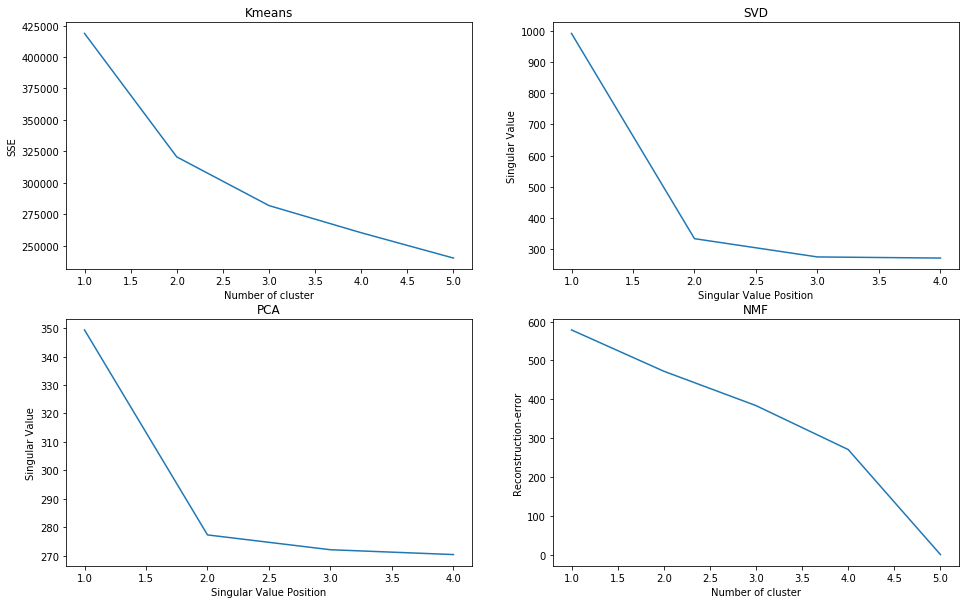

In [26]:
fig = plt.figure(figsize=(16,10))
ax1=fig.add_subplot(221)
s.Kmeans(data,5,ax1)
ax2=fig.add_subplot(222)
s.SVD(data,4,ax2)
ax3=fig.add_subplot(223)
s.PCA(data,4,ax3)
ax4=fig.add_subplot(224)
s.NMF(data,5,ax4)
plt.show()

In [39]:
### Dense matrix prediction######
print(s.Kmeans_pred(data,3,real_label)[1])
print('***********************')
print(s.NMF_pred(data,3,real_label)[1])
print('***********************')
print(s.Kmeans_pred(PCA(3).fit_transform(data),3,real_label)[1])
print('***********************')
print(s.Kmeans_pred(TruncatedSVD(3).fit_transform(data),3,real_label)[1])

[[   0    0 3000]
 [1517 1483    0]
 [1496 1504    0]]
***********************
[[ 544 2154  302]
 [1871    0 1129]
 [1759  187 1054]]
***********************
[[3000    0    0]
 [   0 1483 1517]
 [   0 1504 1496]]
***********************
[[   0 3000    0]
 [1500    0 1500]
 [1548    0 1452]]


In [21]:
#####perform feature expand by dummy######
data_df=pd.DataFrame(data)
data_dummy=pd.get_dummies(data_df,columns=[0,1,2,3,4])
data_dummy.head(3)

,0_0,0_4,0_9,1_0,1_1,1_2,1_3,1_4,1_5,1_6,...,4_0,4_1,4_2,4_3,4_4,4_5,4_6,4_7,4_8,4_9
0,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Kmeans running time:13.465661 sec!
SVD running time:7.318798 sec!
PCA running time:0.069353 sec!
NMF running time:15.398072 sec!


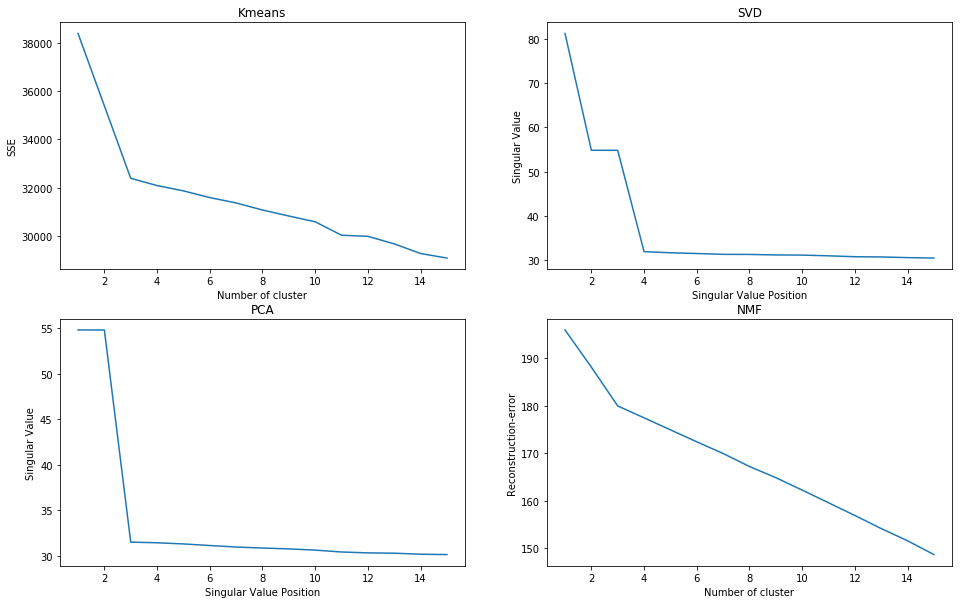

In [32]:
fig = plt.figure(figsize=(16, 10))
ax1=fig.add_subplot(221)
s.Kmeans(data_dummy,15,ax1)
ax2=fig.add_subplot(222)
s.SVD(data_dummy,15,ax2)
ax3=fig.add_subplot(223)
s.PCA(data_dummy,15,ax3)
ax4=fig.add_subplot(224)
s.NMF(data_dummy,15,ax4)
plt.show()

In [38]:
### Sparse matrix prediction######
print(s.Kmeans_pred(data_dummy,3,real_label)[1])
print('***********************')
print(s.NMF_pred(data_dummy,3,real_label)[1])
print('***********************')
print(s.Kmeans_pred(PCA(3).fit_transform(data_dummy),3,real_label)[1])
print('***********************')
print(s.Kmeans_pred(TruncatedSVD(3).fit_transform(data_dummy),3,real_label)[1])

[[3000    0    0]
 [   0 3000    0]
 [   0    0 3000]]
***********************
[[   0    0 3000]
 [3000    0    0]
 [   0 3000    0]]
***********************
[[3000    0    0]
 [   0    0 3000]
 [   0 3000    0]]
***********************
[[3000    0    0]
 [   0 3000    0]
 [   0    0 3000]]
